In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import numpy as np
from tqdm.notebook import tqdm_notebook
base_path = '../data'

100836
60894136
30396650
13157672
181


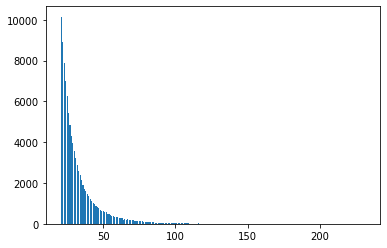

In [4]:
ratings = pd.read_csv(f'{base_path}/ratings_movielens.csv')

u_e = ratings[['userId', 'movieId']]
print(len(u_e))
pairs = pd.merge(u_e, u_e, on='userId', how='outer')
print(len(pairs))
pairs = pairs[pairs.movieId_x < pairs.movieId_y]
print(len(pairs))
pairs = pairs.groupby(['movieId_x', 'movieId_y']).size().reset_index().rename(columns={0:'n_co-rated'})
print(len(pairs))
pairs = pairs[['n_co-rated']].groupby(['n_co-rated']).size().reset_index().rename(columns={0:'t'})
print(len(pairs))
pairs = pairs[20:]
plt.bar(pairs['n_co-rated'], pairs['t'])


plt.show()


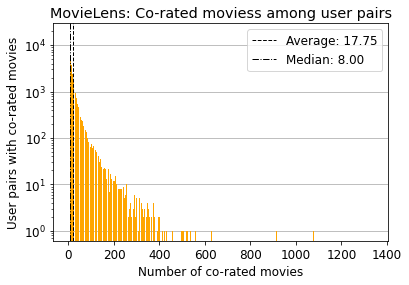

In [11]:
ratings = pd.read_csv('/home/theis/Projects/mi911/analytics/data/movielens.csv')

movie_column = 'movieId'

u_e = ratings[['userId', movie_column]]
pairs = pd.merge(u_e, u_e, on=movie_column, how='outer')
pairs = pairs[pairs.userId_x < pairs.userId_y]
pairs = pairs.groupby(['userId_x', 'userId_y']).size().reset_index().rename(columns={0:'n_co-rated'})
p_average = pairs['n_co-rated'].mean()
p_median = pairs['n_co-rated'].median()

pairs = pairs[['n_co-rated']].groupby(['n_co-rated']).size().reset_index().rename(columns={0:'t'})
fig, axes = plt.subplots(nrows=1)
axes.grid(True, 'major', 'y')

axes.set_yscale('log')
#axes.set_xscale('log')

axes.set_xlabel(f'Number of co-rated movies')
axes.set_ylabel(f'User pairs with co-rated movies')
axes.set_axisbelow(True)

limiter = 600
plt.bar(pairs['n_co-rated'][:limiter], pairs['t'][:limiter], color='orange')

plt.axvline(p_average, color='k', linestyle='dashed', linewidth=1, label=f'Average: {p_average:.2f}')
plt.axvline(p_median, color='k', linestyle='dashdot', linewidth=1, label=f'Median: {p_median:.2f}')

plt.title(f'MovieLens: Co-rated moviess among user pairs')
plt.legend()

plt.rc('font', size=12)

plt.savefig('ml-co-occurance-user.pdf', bbox_inches='tight')

plt.show()


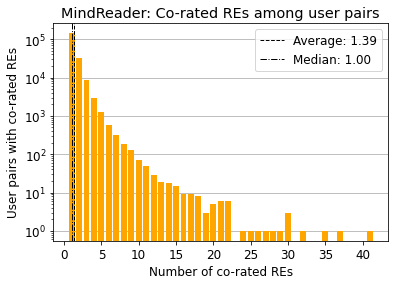

In [10]:
mode = 'RE'

ratings = pd.read_csv('/home/theis/Projects/mi911/analytics/data/mr-100k.csv')
ratings = ratings[ratings.sentiment != 0]
ratings = ratings[ratings.isItem] if mode == 'RE' else ratings[~ratings.isItem]

movie_column = 'uri'
groupon = 'userId'

u_e = ratings[['userId', movie_column]]

pairs = pd.merge(u_e, u_e, on=('userId' if groupon == movie_column else movie_column), how='outer')
del u_e
pairs = pairs[pairs[f'{groupon}_x'] < pairs[f'{groupon}_y']]
pairs = pairs.groupby([f'{groupon}_x', f'{groupon}_y']).size().reset_index().rename(columns={0:'n_co-rated'})
p_average = pairs['n_co-rated'].mean()
p_median = pairs['n_co-rated'].median()

pairs = pairs[['n_co-rated']].groupby(['n_co-rated']).size().reset_index().rename(columns={0:'t'})
#pairs =pairs[:88]

fig, axes = plt.subplots(nrows=1)
axes.grid(True, 'major', 'y')

axes.set_yscale('log')
#axes.set_xscale('log')

axes.set_xlabel(f'Number of co-rated {mode}s' if groupon != movie_column else 'Number of co-rated users')
axes.set_ylabel(f'User pairs with co-rated {mode}s' if groupon != movie_column else f'{mode} pairs with co-rated users')
axes.set_axisbelow(True)
limiter = 150
plt.bar(pairs['n_co-rated'][:limiter], pairs['t'][:limiter], color='orange')
# plt.plot(pairs['n_co-rated'], pairs['t'], color='blue')

plt.axvline(p_average, color='k', linestyle='dashed', linewidth=1, label=f'Average: {p_average:.2f}')
plt.axvline(p_median, color='k', linestyle='dashdot', linewidth=1, label=f'Median: {p_median:.2f}')

#axes.set_xlim([0.5, 80])
plt.title(f'MindReader: Co-rated {mode}s among user pairs')
plt.legend()
plt.rc('font', size=12)

fig_name = f"co-occurrence-{'user' if groupon == movie_column else 'movie'}-{mode}.pdf"
plt.savefig(fig_name, bbox_inches='tight')

plt.show()



100836
None
2698
165.30491803278687
70.5


24920
DE
248
22.43024302430243
19.0


19930
RE
285
17.005119453924916
13.0


44850
None
510
38.267918088737204
31.0


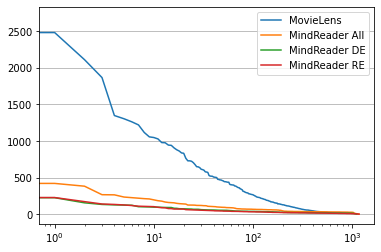

In [8]:
def get_num(path, movie_column, entity_type=None):
    ratings = pd.read_csv(path)
    
    if 'uri' in ratings.columns:
        ratings = ratings[ratings.sentiment != 0]
    
    if entity_type is not None:
        ratings = ratings[ratings.isItem] if entity_type == 'RE' else ratings[~ratings.isItem]
    
    print(f'\n\n{len(ratings)}')
    g = ratings.groupby(movie_column).size().reset_index().rename(columns={0:'t'})
    g = g.sort_values('t', ascending=False)
    print(entity_type)
    print(g['t'].max())
    print(g['t'].mean())
    print(g['t'].median())
    return g

ml = get_num('/home/theis/Projects/mi911/analytics/data/movielens.csv', 'userId')
mr_de = get_num('/home/theis/Projects/mi911/analytics/data/mr-100k.csv', 'userId', 'DE')
mr_re = get_num('/home/theis/Projects/mi911/analytics/data/mr-100k.csv', 'userId', 'RE')
mr = get_num('/home/theis/Projects/mi911/analytics/data/mr-100k.csv', 'userId')
    
fig, axes = plt.subplots(nrows=1)
axes.grid(True, 'major', 'y')

# axes.set_yscale('log')
axes.set_xscale('log')

plt.plot(list(range(len(ml['t']))), ml['t'], label="MovieLens")
plt.plot(list(range(len(mr['t']))), mr['t'], label="MindReader All")
plt.plot(list(range(len(mr_de['t']))), mr_de['t'], label="MindReader DE")
plt.plot(list(range(len(mr_re['t']))), mr_re['t'], label="MindReader RE")
plt.legend()
plt.show()